# Algoritma PageRank  
Page Rank sering digunakan untuk mengetahui page mana yang mempunyai peringkat tertinggi, dimana jika suatu page menerima lebih banyak tautan dari page lain maka page tersebut lebih penting dari page lain. Hubungan antara page dapat mengambil konsep graf, graf merupakan representasi data yang dinyatakan dengan node dan edge yang terhubung. Algoritma page rank dipengaruhi oleh tautan masuk dan tautan keluar.  

* tautan masuk : tautan yang mengarah pada suatu page.  

* tautan keluar : tautan yang keluar dari suatu page.

**contoh graf berikut ini** 

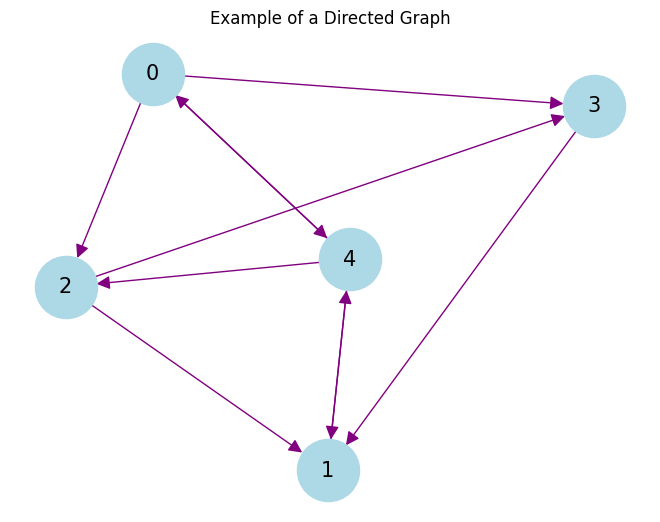

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

# Membuat graf terarah
G = nx.DiGraph()

# Menambahkan node (simpul)
nodes = [0, 1, 2, 3, 4]
G.add_nodes_from(nodes)

# Menambahkan edge (sisi) dengan arah
edges = [(0, 2), (0, 4), (0,3), (1, 4), (2, 1), (2, 3), (3, 1), (4, 1), (4, 2), (4, 0)]
G.add_edges_from(edges)

# Mengatur posisi node
pos = nx.spring_layout(G)

# Menggambar graf
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=15, font_color='black', edge_color='purple', arrowsize=20)

# Menampilkan judul
plt.title('Example of a Directed Graph')

# Menampilkan graf
plt.show()


$$r_j=\sum_{i \rightarrow j} \frac{r_i}{d_i}$$  

* $r_{j}$ : nilai rangking dari node j yang dihitung  
* $\sum_{i \rightarrow j}$ : jumlah dari semua node 𝑖 yang memiliki tautan (link) menuju node 𝑗.
* $r_{i}$ : tautan yang masuk ke node 𝑗.  
* $d_{i}$ : derajat keluar (out-degree) dari node 𝑖 yaitu jumlah tautan yang keluar dari node 𝑖.  

Dengan rumus diatas maka dapat menulis sistem linier :  

$r0 = \frac{r4}{3}$  
$r1 = \frac{r2}{2} + \frac{r4}{3} + r3$  
$r2 = \frac{r0}{3} + \frac{r4}{3}$  
$r3 = \frac{r2}{2} + \frac{r0}{3}$  
$r4 = \frac{r0}{3} + r1$  

maka didapat matriks dari persamaan diatas :  
$$
A =\left(\begin{array}{ccccc}
0 & 0 & 0 & 0 & \frac{1}{3} \\
0 & 0 & \frac{1}{2} & 1 & \frac{1}{3} \\
\frac{1}{3} & 0 & 0 & 0 & \frac{1}{3} \\
\frac{1}{3} & 0 & \frac{1}{2} & 0 & 0 \\
\frac{1}{3} & 1 & 0 & 0 & 0
\end{array}\right)
$$  
$$
V0 = \begin{equation*}
\begin{bmatrix}
0.2\\
0.2\\
0.2\\
0.2\\
0.2
\end{bmatrix}
\end{equation*}
$$  

### Berikut cara menghitung manualnya

In [2]:
import numpy as np
A = np.array([[0,0,0,0,1/3], [0,0,1/2,1,1/3], [1/3,0,0,0,1/3],[1/3,0,1/2,0,0],[1/3,1,0,0,0]])
V0 = np.array([[0.2], [0.2], [0.2], [0.2], [0.2]])

V1 = A @ V0
print("V1 = \n", V1)
V2 = A @ V1
print("V2 = \n", V2)
V3 = A @ V2
print("V3 = \n", V3)

V1 = 
 [[0.06666667]
 [0.36666667]
 [0.13333333]
 [0.16666667]
 [0.26666667]]
V2 = 
 [[0.08888889]
 [0.32222222]
 [0.11111111]
 [0.08888889]
 [0.38888889]]
V3 = 
 [[0.12962963]
 [0.27407407]
 [0.15925926]
 [0.08518519]
 [0.35185185]]


In [3]:
# |V(i+1)-Vi|**2 < toleransi (0,01)
a = (0.12962963 - 0.08888889)**2
b = (0.27407407 - 0.32222222)**2
c = (0.15925926 - 0.11111111)**2
d = (0.08518519 - 0.08888889)**2
e = (0.35185185 - 0.38888889)**2

f = a+b+c+d+e

print(f)

0.007681756318244199


 Penjelasan :  
 * hasil dari $|V_{i+1}-V_{i}|^{2}$ yaitu 0.007681756318244199 < 0,01 .   
 * jadi urutan rangking dari page diatas dari yang paling tinggi adalah r5, r2, r3, r1, r4 


### Berikut menghitung dengan perulangan

In [1]:
import numpy as np

# data seperti di contoh di atas
A = np.array([[0,0,0,0,1/3], [0,0,1/2,1,1/3], [1/3,0,0,0,1/3],[1/3,0,1/2,0,0],[1/3,1,0,0,0]])
Av0 = np.array([[0.2], [0.2], [0.2], [0.2], [0.2]])


def kaliMatrik(A, vlama):
  # mengkalikan matrix dengan vlama
  v = A@vlama
  return v

def convergen(vlama, v, toleransi):
    # menghitung selisih antara vbaru dan vlama
    selisih = v - vlama
    # menghitung nilai convergen nya
    convergen = 0
    for i in selisih:
      convergen += i[0]**2
    # mengembalikan true jika convergen kurang dari nilai toleransi jika tidak false
    return convergen < toleransi

def sort(numpy_arr):
  # sorting data ranking menggunakan algoritma bubble sort
  sorted = False
  i = 0
  rank = []
  data = []
  iter = 1
  for k in numpy_arr:
    data.append(k[0])
    rank.append(iter)
    iter += 1
  
  
  while sorted == False and i < len(data):
    isSwap = False
    for j in range(len(data) - 1 - i):
      if data[j] < data[j + 1]:
        rank[j], rank[j + 1] = rank[j + 1], rank[j]
        data[j], data[j + 1] = data[j + 1], data[j]
        isSwap = True

    if isSwap == False:
      sorted = True
    i += 1
  return rank


# melakukan ranking 
def ranking(v, A, toleransi):
    vlama = v
    coverage = False
    perulangan = 0
    # jika coverage true perulangan berhenti
    while not coverage:
        # mencari vbaru
        vbaru = kaliMatrik(A, vlama)
        # mencari selisih dan membadingkan nya dengan nilai toleransi 
        # jika nilai convergen lebih kecil dari nilai toleransi mengubah coverage menjadi True
        coverage = convergen(vlama, vbaru, toleransi)
        vlama = vbaru
        perulangan += 1
    
    # mengembalikan jumlah looping dan v terakhir
    return (vbaru, perulangan)

# data yang sama seperti contoh di atas
print("Data yang sama dengan contoh di atas")
ranking1 = ranking(Av0, A, 0.01)
print("jumlah perulangan: ", ranking1[1])
print("ranking data: \n", ranking1[0])
print("ranking: ", sort(ranking1[0]))
print()

Data yang sama dengan contoh di atas
jumlah perulangan:  3
ranking data: 
 [[0.12962963]
 [0.27407407]
 [0.15925926]
 [0.08518519]
 [0.35185185]]
ranking:  [5, 2, 3, 1, 4]

